In [1]:
import pandas as pd
train_data = pd.read_csv("train.csv")
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [2]:
# Imputing missing values for 'education' with the mode, which is "Bachelor's"
train_data['education'].fillna("Bachelor's", inplace=True)
# Imputing missing values for 'previous_year_rating' with 0
train_data['previous_year_rating'].fillna(0, inplace=True)
# Verify if there are any missing values left
train_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [3]:
from sklearn.preprocessing import OneHotEncoder
# Selecting the categorical variables for one-hot encoding
categorical_vars = ['department', 'region', 'education', 'gender', 'recruitment_channel']
# Applying one-hot encoding to the categorical variables
one_hot_encoder = OneHotEncoder(drop='first',sparse=False) # avoiding dummy variable trap
encoded_categorical_vars = pd.DataFrame(
    one_hot_encoder.fit_transform(train_data[categorical_vars]),
    columns=one_hot_encoder.get_feature_names_out(categorical_vars)
)
# Resetting the index of our main dataframe to avoid index mismatch before concatenating
train_data.reset_index(drop=True, inplace=True)
# Concatenating the one-hot encoded variables with the main dataframe
train_data = pd.concat([train_data, encoded_categorical_vars], axis=1)
# Dropping the original categorical variables as they are now one-hot encoded
train_data.drop(columns=categorical_vars, inplace=True)
# Displaying the first few rows of the dataframe with the new one-hot encoded variables
train_data.head()

/Users/nurbek.bektursynicloud.com/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,1,0,49,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,65141,1,30,5.0,4,0,0,60,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,7513,1,34,3.0,7,0,0,50,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2542,2,39,1.0,10,0,0,50,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,48945,1,45,3.0,2,0,0,73,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
test_data = pd.read_csv('test.csv')
# Step 1: Imputing missing values
test_data['education'].fillna("Bachelor's", inplace=True)
test_data['previous_year_rating'].fillna(0, inplace=True)

# Step 2: One-hot encoding for categorical variables
categorical_vars = ['department', 'region', 'education', 'gender', 'recruitment_channel']
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)  # Reusing the same parameters

# Applying one-hot encoding to the test dataset
encoded_categorical_vars_test = pd.DataFrame(
    one_hot_encoder.fit_transform(test_data[categorical_vars]),
    columns=one_hot_encoder.get_feature_names_out(categorical_vars)
)

# Resetting index before concatenation
test_data.reset_index(drop=True, inplace=True)

# Concatenating the one-hot encoded variables with the main dataframe
test_data = pd.concat([test_data, encoded_categorical_vars_test], axis=1)

# Dropping the original categorical variables
test_data.drop(columns=categorical_vars, inplace=True)
test_data.head()

/Users/nurbek.bektursynicloud.com/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,8724,1,24,0.0,1,1,0,77,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,74430,1,31,3.0,5,0,0,51,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,72255,1,31,1.0,4,0,0,47,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,38562,3,31,2.0,9,0,0,65,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,64486,1,30,4.0,7,0,0,61,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [5]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Define the features (X) and target (y)
X = train_data.drop(['employee_id', 'is_promoted'] + list(train_data.filter(regex='region').columns), axis=1)
y = train_data['is_promoted']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for models like Logistic Regression and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Set up the hyperparameter grids
param_grid = {
    'DecisionTreeClassifier': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1, 2]
    },
    # Gradient Boosting hyperparameters
    'GradientBoostingClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    # Logistic Regression hyperparameters
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    }
}
# Initialize the models
models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

# Initialize the results dictionary
tuned_models = {}
best_params = {}
best_scores = {}
best_auroc = {}

# Function to calculate the total number of combinations in the grid
def total_combinations(param_grid):
    total = 1
    for param, values in param_grid.items():
        total *= len(values) if isinstance(values, list) else 1
    return total
# Perform random search for each model
for model_name, model in models.items():
    if param_grid[model_name]:  # Check if there are hyperparameters to tune
        # Calculate the number of iterations which is the minimum of 10 or total combinations
        n_iter_search = min(10, total_combinations(param_grid[model_name]))
        random_search = RandomizedSearchCV(model, param_grid[model_name], n_iter=n_iter_search, cv=5, scoring='f1', verbose=1, n_jobs=-1, random_state=42)
        random_search.fit(X_train_scaled if model_name in ['KNeighborsClassifier', 'LogisticRegression'] else X_train, y_train)
        tuned_models[model_name] = random_search.best_estimator_
        best_params[model_name] = random_search.best_params_
        best_scores[model_name] = random_search.best_score_
        # Calculate AUROC on the validation set
        y_pred_proba = random_search.predict_proba(X_val_scaled if model_name in ['KNeighborsClassifier', 'LogisticRegression'] else X_val)[:,1]
        auroc_score = roc_auc_score(y_val, y_pred_proba)
        best_auroc[model_name] = auroc_score 

# Output the best parameters, scores, and AUROC for each model
print("Best parameters, scores, and AUROC for each model:")
for model_name in best_params:
    print(f"{model_name} best params: {best_params[model_name]}")
    print(f"{model_name} best score: {best_scores[model_name]}")
    print(f"{model_name} AUROC: {best_auroc[model_name]}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters, scores, and AUROC for each model:
DecisionTreeClassifier best params: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20}
DecisionTreeClassifier best score: 0.4619483118179094
DecisionTreeClassifier AUROC: 0.8043095916412606
RandomForestClassifier best params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
RandomForestClassifier best score: 0.47477207620811945
RandomForestClassifier AUROC: 0.8839430073199437
KNeighborsClassifier best params: {'weights': 'uniform', 'p': 2, 'n_neighbors': 3, 'algorithm': 'ball_tree'}
KNeighborsClassifier best score: 0.326310185117027
KNeighborsClassifier AUROC: 0.7132303841195868
Gradi

In [6]:
# Best parameters for GradientBoostingClassifier (as obtained from the tuning)
best_params_gbc = {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}

# Instantiate GradientBoostingClassifier with the best parameters
gbc_model = GradientBoostingClassifier(**best_params_gbc, random_state=42)

# Fit the model on the entire training dataset
gbc_model.fit(X, y) 

# Store 'employee_id' from the test_data
employee_ids = test_data['employee_id']
# Assuming that region-related columns contain the word 'region' in their names
region_columns = [col for col in test_data.columns if 'region' in col]
# Prepare test_data for prediction (excluding 'employee_id' and region-related columns)
test_data_filtered = test_data.drop(columns=['employee_id'] + region_columns)

# Now, using the GradientBoostingClassifier to make predictions on the filtered test_data
test_data_predictions = gbc_model.predict(test_data_filtered)

# Convert predictions into a DataFrame
predictions_df = pd.DataFrame({
    'employee_id': employee_ids,
    'is_promoted': test_data_predictions
})
predictions_df

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


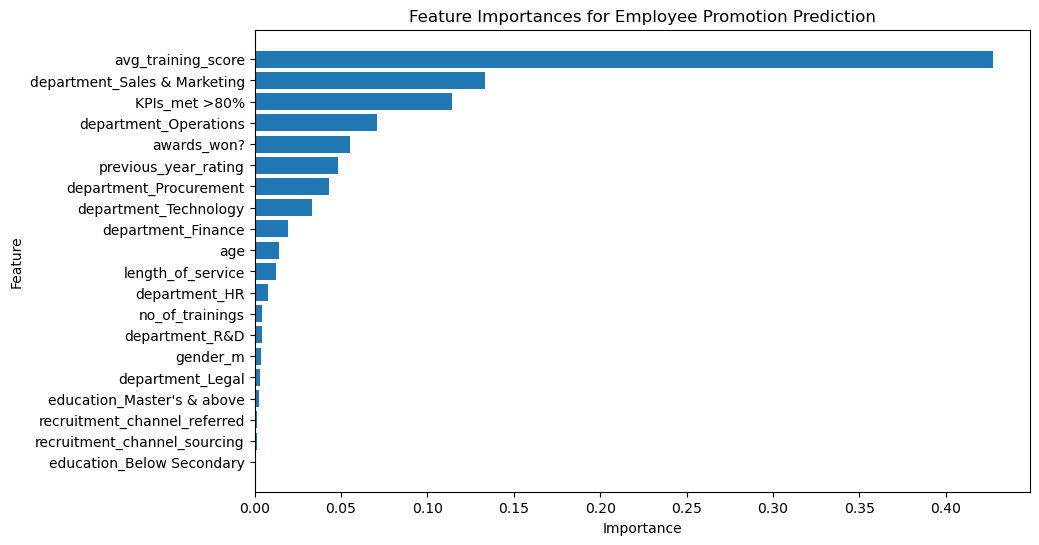

In [7]:
import matplotlib.pyplot as plt
# Get feature importances
feature_importances = gbc_model.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Employee Promotion Prediction')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()